In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.cluster.util import cosine_distance

plt.style.use('seaborn-dark')

In [2]:
wordsim = pd.read_csv('~/Dataset/wordsim353/set1.csv')

In [3]:
correlations = wordsim.drop(wordsim.columns[[0,1]], axis=1)

In [4]:
correlations.corr()

,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13
Human (mean),1.000000,0.871378,0.863689,0.930996,0.856117,0.718902,0.838984,0.900457,0.884141,0.886093,0.871647,0.798642,0.873629,0.913636
1,0.871378,1.000000,0.760265,0.789040,0.683641,0.606674,0.768779,0.765995,0.769414,0.789705,0.764094,0.691009,0.713354,0.733506
2,0.863689,0.760265,1.000000,0.796937,0.701228,0.589334,0.672551,0.730031,0.756376,0.748456,0.718733,0.698245,0.757268,0.757495
3,0.930996,0.789040,0.796937,1.000000,0.808452,0.607450,0.809276,0.849604,0.794398,0.786254,0.781849,0.744402,0.772696,0.853489
4,0.856117,0.683641,0.701228,0.808452,1.000000,0.645478,0.713990,0.782944,0.718921,0.676313,0.686438,0.667725,0.703191,0.787241
5,0.718902,0.606674,0.589334,0.607450,0.645478,1.000000,0.569396,0.604789,0.579652,0.612155,0.594144,0.565329,0.621192,0.676420
6,0.838984,0.768779,0.672551,0.809276,0.713990,0.569396,1.000000,0.777906,0.731263,0.754695,0.657453,0.596985,0.638840,0.767313
7,0.900457,0.765995,0.730031,0.849604,0.782944,0.604789,0.777906,1.000000,0.797070,0.799985,0.748931,0.618437,0.762663,0.833222
8,0.884141,0.769414,0.756376,0.794398,0.718921,0.579652,0.731263,0.797070,1.000000,0.791219,0.752959,0.649677,0.775899,0.770754
9,0.886093,0.789705,0.748456,0.786254,0.676313,0.612155,0.754695,0.799985,0.791219,1.000000,0.778473,0.643984,0.773133,0.805656


In [5]:
import gensim

In [6]:
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/kreutzer/Dataset/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [9]:
similarities = []
for word1,word2 in zip(wordsim['Word 1'],wordsim['Word 2']):
    similarities.append(model.similarity(word1,word2))

In [10]:
correlations['w2v (google news)'] = pd.Series(np.array(similarities))

In [12]:
w2v_wiki = gensim.models.KeyedVectors.load_word2vec_format('/Users/kreutzer/Dropbox/Dataset/w2v_wiki_201805')

In [20]:
similarities = []
for word1,word2 in zip(wordsim['Word 1'],wordsim['Word 2']):
    similarities.append(w2v_wiki.similarity(word1.lower(),word2.lower()))

In [21]:
correlations['w2v (wiki)'] = pd.Series(np.array(similarities))

In [15]:
import gensim.downloader as api

In [16]:
model_glove_twitter = api.load('glove-twitter-200')

In [17]:
model_glove_wiki = api.load('glove-wiki-gigaword-300')

In [18]:
similarities = []
for word1,word2 in zip(wordsim['Word 1'],wordsim['Word 2']):
    similarities.append(model_glove_wiki.similarity(word1.lower(),word2.lower()))

In [19]:
correlations['glove (wiki)'] = pd.Series(np.array(similarities))

In [23]:
similarities = []
for word1,word2 in zip(wordsim['Word 1'],wordsim['Word 2']):
    similarities.append(model_glove_twitter.similarity(word1.lower(),word2.lower()))

In [24]:
correlations['glove (twitter)'] = pd.Series(np.array(similarities))

In [126]:
correlations.iloc[:, 1:14] = correlations.iloc[:, 1:14] / 10

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,NaN,0.760265,0.789040,0.683641,0.606674,0.768779,0.765995,0.769414,0.789705,0.764094,0.691009,0.713354,0.733506
2,NaN,NaN,0.796937,0.701228,0.589334,0.672551,0.730031,0.756376,0.748456,0.718733,0.698245,0.757268,0.757495
3,NaN,NaN,NaN,0.808452,0.607450,0.809276,0.849604,0.794398,0.786254,0.781849,0.744402,0.772696,0.853489
4,NaN,NaN,NaN,NaN,0.645478,0.713990,0.782944,0.718921,0.676313,0.686438,0.667725,0.703191,0.787241
5,NaN,NaN,NaN,NaN,NaN,0.569396,0.604789,0.579652,0.612155,0.594144,0.565329,0.621192,0.676420
6,NaN,NaN,NaN,NaN,NaN,NaN,0.777906,0.731263,0.754695,0.657453,0.596985,0.638840,0.767313
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.797070,0.799985,0.748931,0.618437,0.762663,0.833222
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.791219,0.752959,0.649677,0.775899,0.770754
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778473,0.643984,0.773133,0.805656
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.672087,0.781227,0.770611


In [89]:
correlations_human_human = correlations.corr().iloc[1:14,1:14].where(np.triu(np.ones(correlations.corr().iloc[1:14,1:14].shape)).astype(np.bool))

In [93]:
correlations_human_human.replace(to_replace=1.0, value=np.NaN, inplace=True)

In [179]:
corr_hh_np = correlations_human_human.values[~np.isnan(correlations_human_human.values)]

In [181]:
print(np.mean(corr_hh_np),np.std(corr_hh_np))

0.7229037858041968 0.07213552351866483


In [184]:
corr_mm_np = correlations_model.values[~np.isnan(correlations_model.values)]

In [218]:
print(np.mean(corr_mm_np),np.std(corr_mm_np,ddof=1))

0.7720950662237734 0.09273946542787309


In [196]:
corr_mm_np = correlations.corr().values[~np.isnan(correlations_model.values)]

array([0.76026528, 0.78903959, 0.68364129, 0.60667405, 0.76877854,
       0.76599543, 0.76941353, 0.78970506, 0.76409358, 0.69100946,
       0.7133541 , 0.73350644, 0.79693711, 0.70122756, 0.58933419,
       0.67255128, 0.73003092, 0.75637571, 0.74845644, 0.7187334 ,
       0.69824503, 0.75726825, 0.7574947 , 0.80845168, 0.60745048,
       0.80927572, 0.84960434, 0.79439847, 0.78625445, 0.78184855,
       0.74440231, 0.77269606, 0.853489  , 0.64547785, 0.71398957,
       0.78294369, 0.71892079, 0.67631279, 0.68643763, 0.6677246 ,
       0.70319098, 0.78724053, 0.56939574, 0.60478865, 0.57965181,
       0.61215456, 0.59414353, 0.56532917, 0.62119175, 0.67642034,
       0.77790631, 0.7312629 , 0.75469541, 0.65745304, 0.59698536,
       0.63884023, 0.76731257, 0.7970701 , 0.79998487, 0.74893104,
       0.61843708, 0.76266261, 0.83322242, 0.79121873, 0.75295875,
       0.64967737, 0.77589878, 0.77075375, 0.77847286, 0.64398413,
       0.77313322, 0.80565648, 0.67208661, 0.78122745, 0.77061

In [137]:
scores_model = correlations.iloc[:,14:18].corr()

In [200]:
corr_hm_np = correlations_human_model.values[~np.isnan(correlations_human_model.values)]

In [202]:
print(np.mean(corr_hm_np),np.std(corr_hm_np))

0.6618776924033952 0.11031839732019996


In [35]:
np.triu(np.ones(correlations.corr().shape)).astype(np.bool)
correlations.corr().iloc[1:14,1:14].mean().mean()

0.744218879203874

In [75]:
correlations_model = correlations.corr().iloc[14:18,14:18].where(np.triu(np.ones(correlations.corr().iloc[14:18,14:18].shape)).astype(np.bool))

In [78]:
correlations_model.replace(to_replace=1.0, value=np.NaN, inplace=True)

In [79]:
model_model_mean = correlations_model.mean().mean()
model_model_std = correlations_model.std().std()

In [150]:
correlations_human_human.std()

1     0.054083
2     0.055764
3     0.069322
4     0.048814
5     0.035818
6     0.071469
7     0.075504
8     0.056692
9     0.072301
10    0.060182
11    0.000937
12         NaN
13         NaN
dtype: float64

In [80]:
print(model_model_mean, model_model_std)

0.7980308085308123 0.04954674850764968


In [204]:
correlations_human_model = correlations.corr().iloc[1:14,14:18].where(np.triu(np.ones(correlations.corr().iloc[1:14,14:18].shape)).astype(np.bool))

In [208]:
correlations_human_model = correlations.corr().iloc[1:14,14:18].where((np.ones(correlations.corr().iloc[1:14,14:18].shape)).astype(np.bool))

In [205]:
correlations_human_model.replace(to_replace=1.0, value=np.NaN, inplace=True)

In [216]:
print(np.mean(correlations_human_model.values),np.std(correlations_human_model.values))

0.5576211630152261 0.07307503274700564


In [207]:
correlations.corr()

,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,w2v (google news),w2v (wiki),glove (wiki),glove (twitter)
Human (mean),1.000000,0.871378,0.863689,0.930996,0.856117,0.718902,0.838984,0.900457,0.884141,0.886093,0.871647,0.798642,0.873629,0.913636,0.664588,0.692227,0.669359,0.564702
1,0.871378,1.000000,0.760265,0.789040,0.683641,0.606674,0.768779,0.765995,0.769414,0.789705,0.764094,0.691009,0.713354,0.733506,0.520388,0.555683,0.497097,0.400183
2,0.863689,0.760265,1.000000,0.796937,0.701228,0.589334,0.672551,0.730031,0.756376,0.748456,0.718733,0.698245,0.757268,0.757495,0.510730,0.522382,0.517620,0.415758
3,0.930996,0.789040,0.796937,1.000000,0.808452,0.607450,0.809276,0.849604,0.794398,0.786254,0.781849,0.744402,0.772696,0.853489,0.607102,0.617559,0.626240,0.522493
4,0.856117,0.683641,0.701228,0.808452,1.000000,0.645478,0.713990,0.782944,0.718921,0.676313,0.686438,0.667725,0.703191,0.787241,0.546323,0.620377,0.616334,0.489361
5,0.718902,0.606674,0.589334,0.607450,0.645478,1.000000,0.569396,0.604789,0.579652,0.612155,0.594144,0.565329,0.621192,0.676420,0.506716,0.527647,0.513680,0.474507
6,0.838984,0.768779,0.672551,0.809276,0.713990,0.569396,1.000000,0.777906,0.731263,0.754695,0.657453,0.596985,0.638840,0.767313,0.511035,0.525285,0.562871,0.502932
7,0.900457,0.765995,0.730031,0.849604,0.782944,0.604789,0.777906,1.000000,0.797070,0.799985,0.748931,0.618437,0.762663,0.833222,0.647966,0.661453,0.652372,0.545533
8,0.884141,0.769414,0.756376,0.794398,0.718921,0.579652,0.731263,0.797070,1.000000,0.791219,0.752959,0.649677,0.775899,0.770754,0.624819,0.643887,0.616397,0.535985
9,0.886093,0.789705,0.748456,0.786254,0.676313,0.612155,0.754695,0.799985,0.791219,1.000000,0.778473,0.643984,0.773133,0.805656,0.604149,0.611784,0.569255,0.476127


In [85]:
human_model_mean = correlations_human_model.mean().mean()
human_model_std = correlations_human_model.std().std()

In [86]:
print(human_human_mean,human_human_sd)
print(model_model_mean,model_model_std)
print(human_model_mean,human_model_std)

0.725477949995614 0.02500687784357106
0.7980308085308123 0.04954674850764968
0.6893515779830937 0.0288330953351577


0.7617543792632131

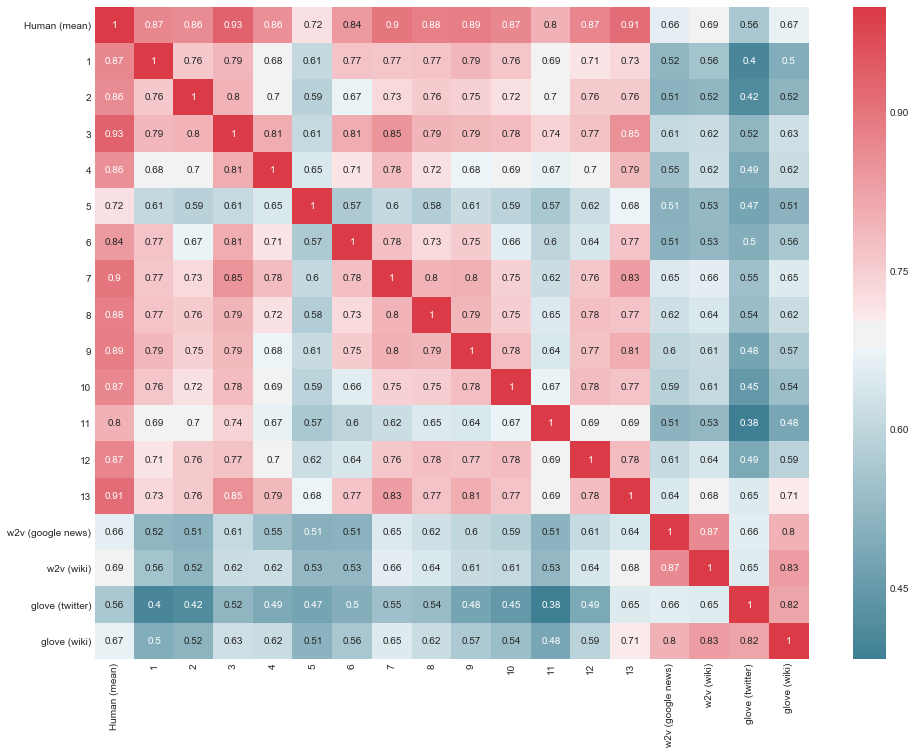

In [135]:
import seaborn as sns

plt.figure(figsize=(16,12))
corr = correlations.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True)
plt.savefig('wordsim_heat_set1.png')
plt.show()

In [97]:
correlations.rename(columns = {'w2v':'w2v (google news)'}, inplace=True)

In [99]:
wordsim2 = pd.read_csv('~/Dataset/wordsim353/set2.csv')

In [100]:
wordsim2

,Word 1,Word 2,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,energy,secretary,1.81,1,0.00,4.0,2,4,5,1,1,1.0,0.0,1,1,4,0,2,2
1,secretary,senate,5.06,7,1.00,7.0,4,4,7,1,3,4.0,8.0,4,5,6,7,6,7
2,energy,laboratory,5.09,7,1.00,7.5,4,6,7,4,6,1.0,2.0,4,3,7,9,6,7
3,computer,laboratory,6.78,8,5.00,8.0,7,6,9,6,7,6.0,7.5,4,5,8,9,7,6
4,weapon,secret,6.06,7,4.00,8.0,6,6,9,2,6,3.0,6.0,5,6,8,9,7,5
5,FBI,fingerprint,6.94,8,6.00,8.0,5,5,9,7,7,6.0,6.0,6,8,9,7,6,8
6,FBI,investigation,8.31,9,9.00,8.5,9,7,9,8,8,8.0,7.5,6,9,10,9,7,9
7,investigation,effort,4.59,5,1.00,7.5,2,4,7,6,5,2.0,2.0,2,7,6,5,6,6
8,Mars,water,2.94,2,1.00,3.0,2,1,8,0,4,2.0,6.0,1,1,3,0,5,8
9,Mars,scientist,5.63,8,1.00,7.0,4,6,8,1,6,5.0,6.0,2,9,7,5,7,8


In [101]:
correlations2 = wordsim2.drop(wordsim.columns[[0,1]], axis=1)

In [102]:
correlations2

,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.81,1,0.00,4.0,2,4,5,1,1,1.0,0.0,1,1,4,0,2,2
1,5.06,7,1.00,7.0,4,4,7,1,3,4.0,8.0,4,5,6,7,6,7
2,5.09,7,1.00,7.5,4,6,7,4,6,1.0,2.0,4,3,7,9,6,7
3,6.78,8,5.00,8.0,7,6,9,6,7,6.0,7.5,4,5,8,9,7,6
4,6.06,7,4.00,8.0,6,6,9,2,6,3.0,6.0,5,6,8,9,7,5
5,6.94,8,6.00,8.0,5,5,9,7,7,6.0,6.0,6,8,9,7,6,8
6,8.31,9,9.00,8.5,9,7,9,8,8,8.0,7.5,6,9,10,9,7,9
7,4.59,5,1.00,7.5,2,4,7,6,5,2.0,2.0,2,7,6,5,6,6
8,2.94,2,1.00,3.0,2,1,8,0,4,2.0,6.0,1,1,3,0,5,8
9,5.63,8,1.00,7.0,4,6,8,1,6,5.0,6.0,2,9,7,5,7,8


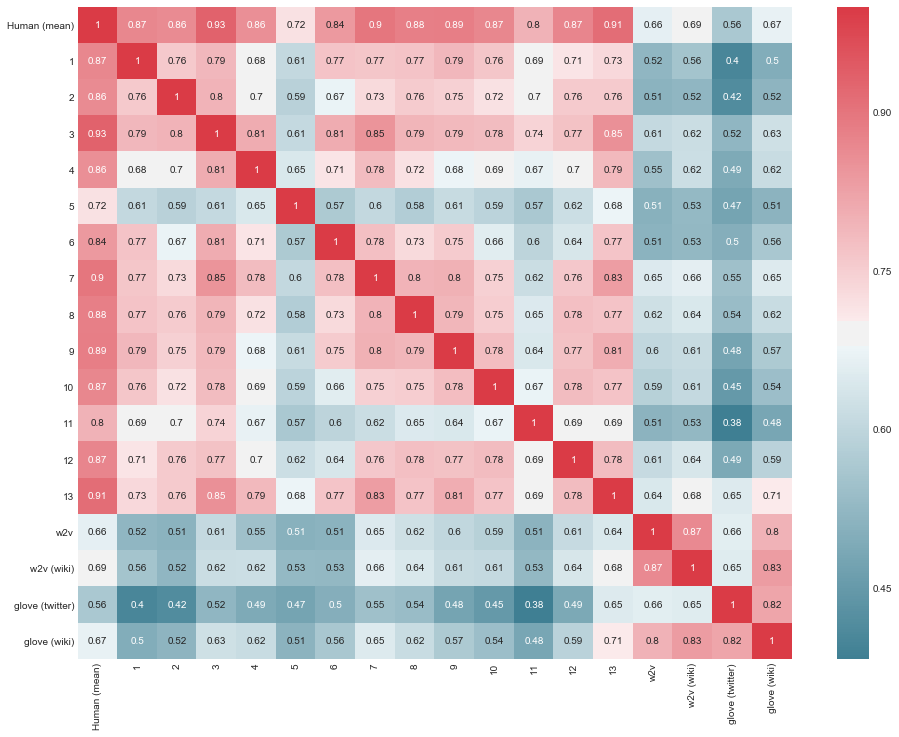

In [93]:
import seaborn as sns

plt.figure(figsize=(16,12))
corr2 = correlations2.corr()
sns.heatmap(corr2, cmap=colormap, annot=True)
plt.show()

In [126]:
similarities = []
for word1,word2 in zip(wordsim2['Word 1'],wordsim2['Word 2']):
    try:
        similarities.append(model_glove_twitter.similarity(word1.lower(),word2.lower()))
    except KeyError:
        continue

In [127]:
correlations2['glove (twitter)'] = pd.Series(np.array(similarities))

In [128]:
correlations2.corr()

,Human (mean),1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,w2v (google news),w2v (wiki),glove (twitter),glove (wiki)
Human (mean),1.000000,0.758559,0.769960,0.829486,0.822017,0.568674,0.741374,0.768348,0.840605,0.807425,...,0.750307,0.759214,0.814357,0.579906,0.742465,0.786549,0.626792,0.605811,0.208152,0.536688
1,0.758559,1.000000,0.592035,0.603847,0.597405,0.343447,0.569373,0.569497,0.636881,0.593584,...,0.546780,0.557112,0.617300,0.376424,0.515517,0.613398,0.484027,0.491877,0.092568,0.420663
2,0.769960,0.592035,1.000000,0.568105,0.603402,0.352902,0.512510,0.600497,0.686815,0.663001,...,0.590017,0.557772,0.605770,0.291822,0.597163,0.561640,0.607179,0.495448,0.095906,0.464386
3,0.829486,0.603847,0.568105,1.000000,0.659400,0.396464,0.655489,0.627592,0.649580,0.637725,...,0.597258,0.588943,0.712307,0.465888,0.588044,0.589798,0.439507,0.424809,0.147183,0.416276
4,0.822017,0.597405,0.603402,0.659400,1.000000,0.430081,0.539009,0.608089,0.709010,0.647170,...,0.678647,0.588042,0.640284,0.417716,0.602235,0.618056,0.551651,0.521980,0.147772,0.433211
5,0.568674,0.343447,0.352902,0.396464,0.430081,1.000000,0.361982,0.383955,0.464714,0.427446,...,0.469302,0.506172,0.366112,0.366578,0.366388,0.391301,0.318642,0.335118,0.167797,0.271418
6,0.741374,0.569373,0.512510,0.655489,0.539009,0.361982,1.000000,0.563373,0.584293,0.539266,...,0.413527,0.493775,0.592876,0.438366,0.540427,0.698368,0.440072,0.462265,0.196296,0.430139
7,0.768348,0.569497,0.600497,0.627592,0.608089,0.383955,0.563373,1.000000,0.604613,0.580364,...,0.576313,0.488276,0.592341,0.340042,0.618985,0.611530,0.461180,0.426566,0.175718,0.417830
8,0.840605,0.636881,0.686815,0.649580,0.709010,0.464714,0.584293,0.604613,1.000000,0.670976,...,0.669212,0.602200,0.685423,0.426998,0.577938,0.642426,0.604629,0.591335,0.158952,0.490788
9,0.807425,0.593584,0.663001,0.637725,0.647170,0.427446,0.539266,0.580364,0.670976,1.000000,...,0.634092,0.601977,0.642626,0.363617,0.574334,0.642382,0.519707,0.498933,0.163719,0.422178


In [131]:
correlations2 = correlations2.drop(['glove (twitter)'], axis=1)

,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,w2v (google news),w2v (wiki),glove (wiki)
Human (mean),1.000000,0.758559,0.769960,0.829486,0.822017,0.568674,0.741374,0.768348,0.840605,0.807425,0.733651,0.750307,0.759214,0.814357,0.579906,0.742465,0.786549,0.626792,0.605811,0.536688
1,0.758559,1.000000,0.592035,0.603847,0.597405,0.343447,0.569373,0.569497,0.636881,0.593584,0.539266,0.546780,0.557112,0.617300,0.376424,0.515517,0.613398,0.484027,0.491877,0.420663
2,0.769960,0.592035,1.000000,0.568105,0.603402,0.352902,0.512510,0.600497,0.686815,0.663001,0.480890,0.590017,0.557772,0.605770,0.291822,0.597163,0.561640,0.607179,0.495448,0.464386
3,0.829486,0.603847,0.568105,1.000000,0.659400,0.396464,0.655489,0.627592,0.649580,0.637725,0.634314,0.597258,0.588943,0.712307,0.465888,0.588044,0.589798,0.439507,0.424809,0.416276
4,0.822017,0.597405,0.603402,0.659400,1.000000,0.430081,0.539009,0.608089,0.709010,0.647170,0.539149,0.678647,0.588042,0.640284,0.417716,0.602235,0.618056,0.551651,0.521980,0.433211
5,0.568674,0.343447,0.352902,0.396464,0.430081,1.000000,0.361982,0.383955,0.464714,0.427446,0.362785,0.469302,0.506172,0.366112,0.366578,0.366388,0.391301,0.318642,0.335118,0.271418
6,0.741374,0.569373,0.512510,0.655489,0.539009,0.361982,1.000000,0.563373,0.584293,0.539266,0.526569,0.413527,0.493775,0.592876,0.438366,0.540427,0.698368,0.440072,0.462265,0.430139
7,0.768348,0.569497,0.600497,0.627592,0.608089,0.383955,0.563373,1.000000,0.604613,0.580364,0.499410,0.576313,0.488276,0.592341,0.340042,0.618985,0.611530,0.461180,0.426566,0.417830
8,0.840605,0.636881,0.686815,0.649580,0.709010,0.464714,0.584293,0.604613,1.000000,0.670976,0.556473,0.669212,0.602200,0.685423,0.426998,0.577938,0.642426,0.604629,0.591335,0.490788
9,0.807425,0.593584,0.663001,0.637725,0.647170,0.427446,0.539266,0.580364,0.670976,1.000000,0.570836,0.634092,0.601977,0.642626,0.363617,0.574334,0.642382,0.519707,0.498933,0.422178


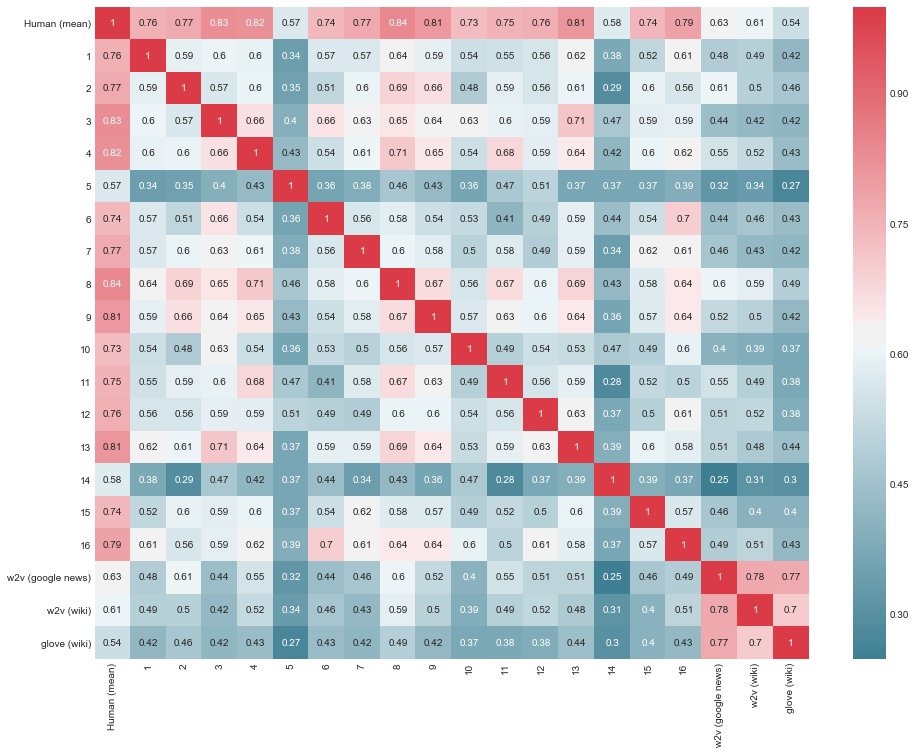

In [134]:
import seaborn as sns

plt.figure(figsize=(16,12))
corr2 = correlations2.corr()
sns.heatmap(corr2, cmap=colormap, annot=True)
plt.savefig('wordsim_heat_set2.png')
plt.show()

In [140]:
model_concept['/c/en/love']

array([ 1.232e-01,  1.346e-01,  1.190e-02,  7.160e-02,  1.855e-01,
        4.640e-02,  1.466e-01, -9.280e-02, -5.900e-03,  1.469e-01,
        6.770e-02,  7.560e-02, -5.890e-02,  9.900e-02,  5.730e-02,
       -1.030e-02, -4.900e-02, -6.800e-03,  2.280e-02,  3.130e-02,
        9.100e-03, -6.070e-02,  4.920e-02,  1.110e-02, -4.910e-02,
       -3.880e-02,  4.770e-02, -1.144e-01,  7.080e-02, -1.470e-01,
       -1.969e-01, -1.339e-01, -2.500e-02, -1.196e-01, -2.770e-02,
        2.080e-02,  1.215e-01,  2.440e-02, -5.580e-02,  4.390e-02,
        9.360e-02, -4.570e-02,  5.180e-02, -1.257e-01, -9.600e-03,
       -2.050e-02,  1.510e-02, -4.800e-03, -6.330e-02, -1.550e-01,
        4.840e-02, -8.600e-03,  2.670e-02, -1.389e-01, -2.050e-02,
       -3.910e-02, -3.460e-02, -1.809e-01, -2.080e-02,  7.660e-02,
       -2.000e-02,  1.590e-02,  1.130e-01, -3.590e-02, -7.810e-02,
        1.000e-04, -5.140e-02,  2.750e-02,  5.200e-03,  2.900e-02,
       -9.240e-02, -2.370e-02,  8.400e-02,  4.120e-02,  3.800e

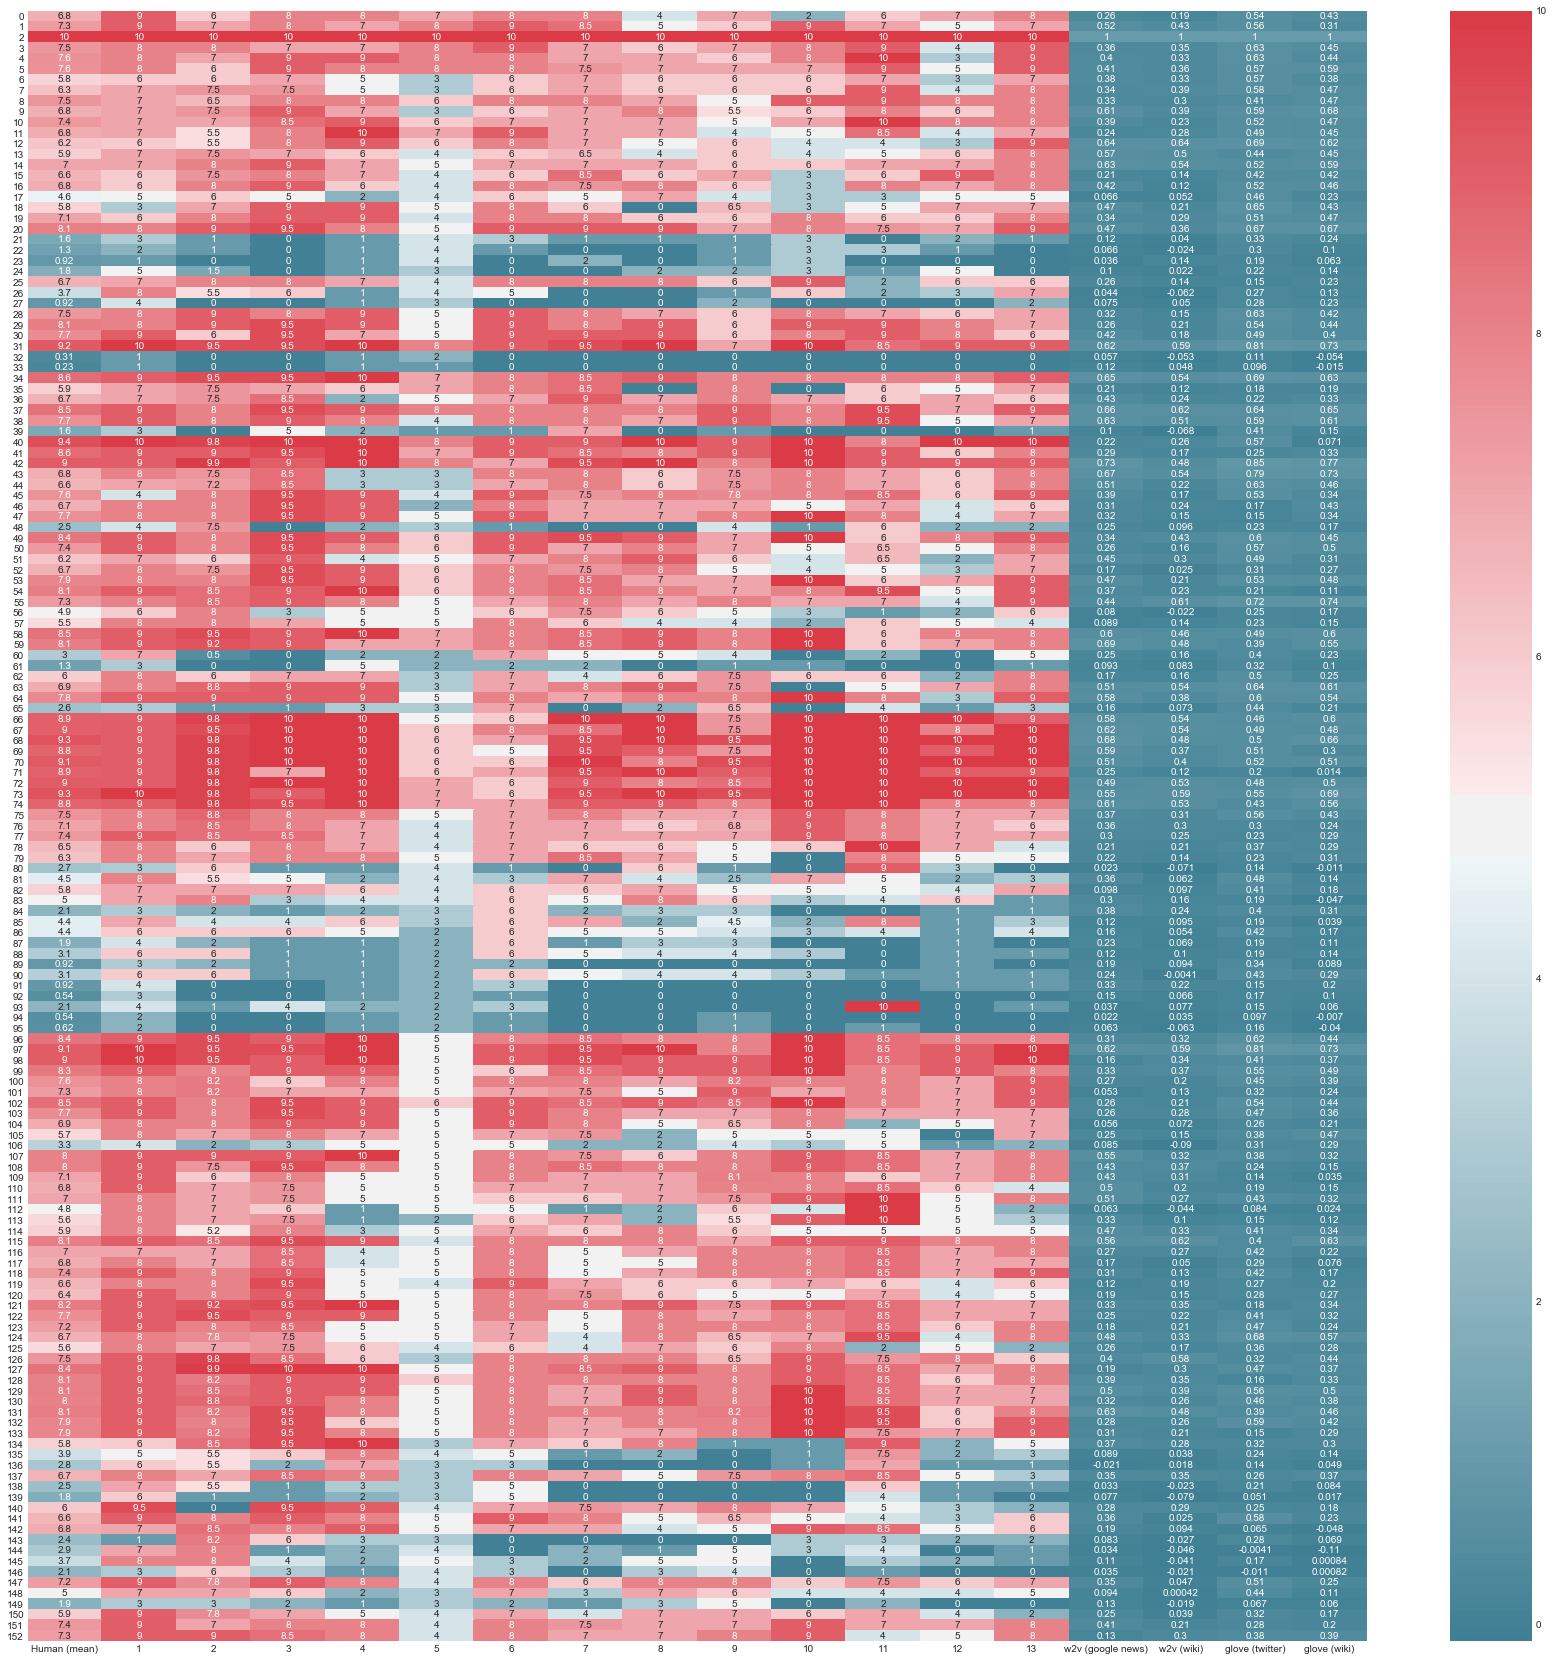

In [156]:
import seaborn as sns

plt.figure(figsize=(30,30))
# corr = correlations.corr()
sns.heatmap(correlations, cmap=colormap, annot=True)
# plt.savefig('wordsim_heat_set2.png')
plt.show()

In [167]:
correlations.iloc[:, 0:14] = correlations.iloc[:, 0:14] / 10

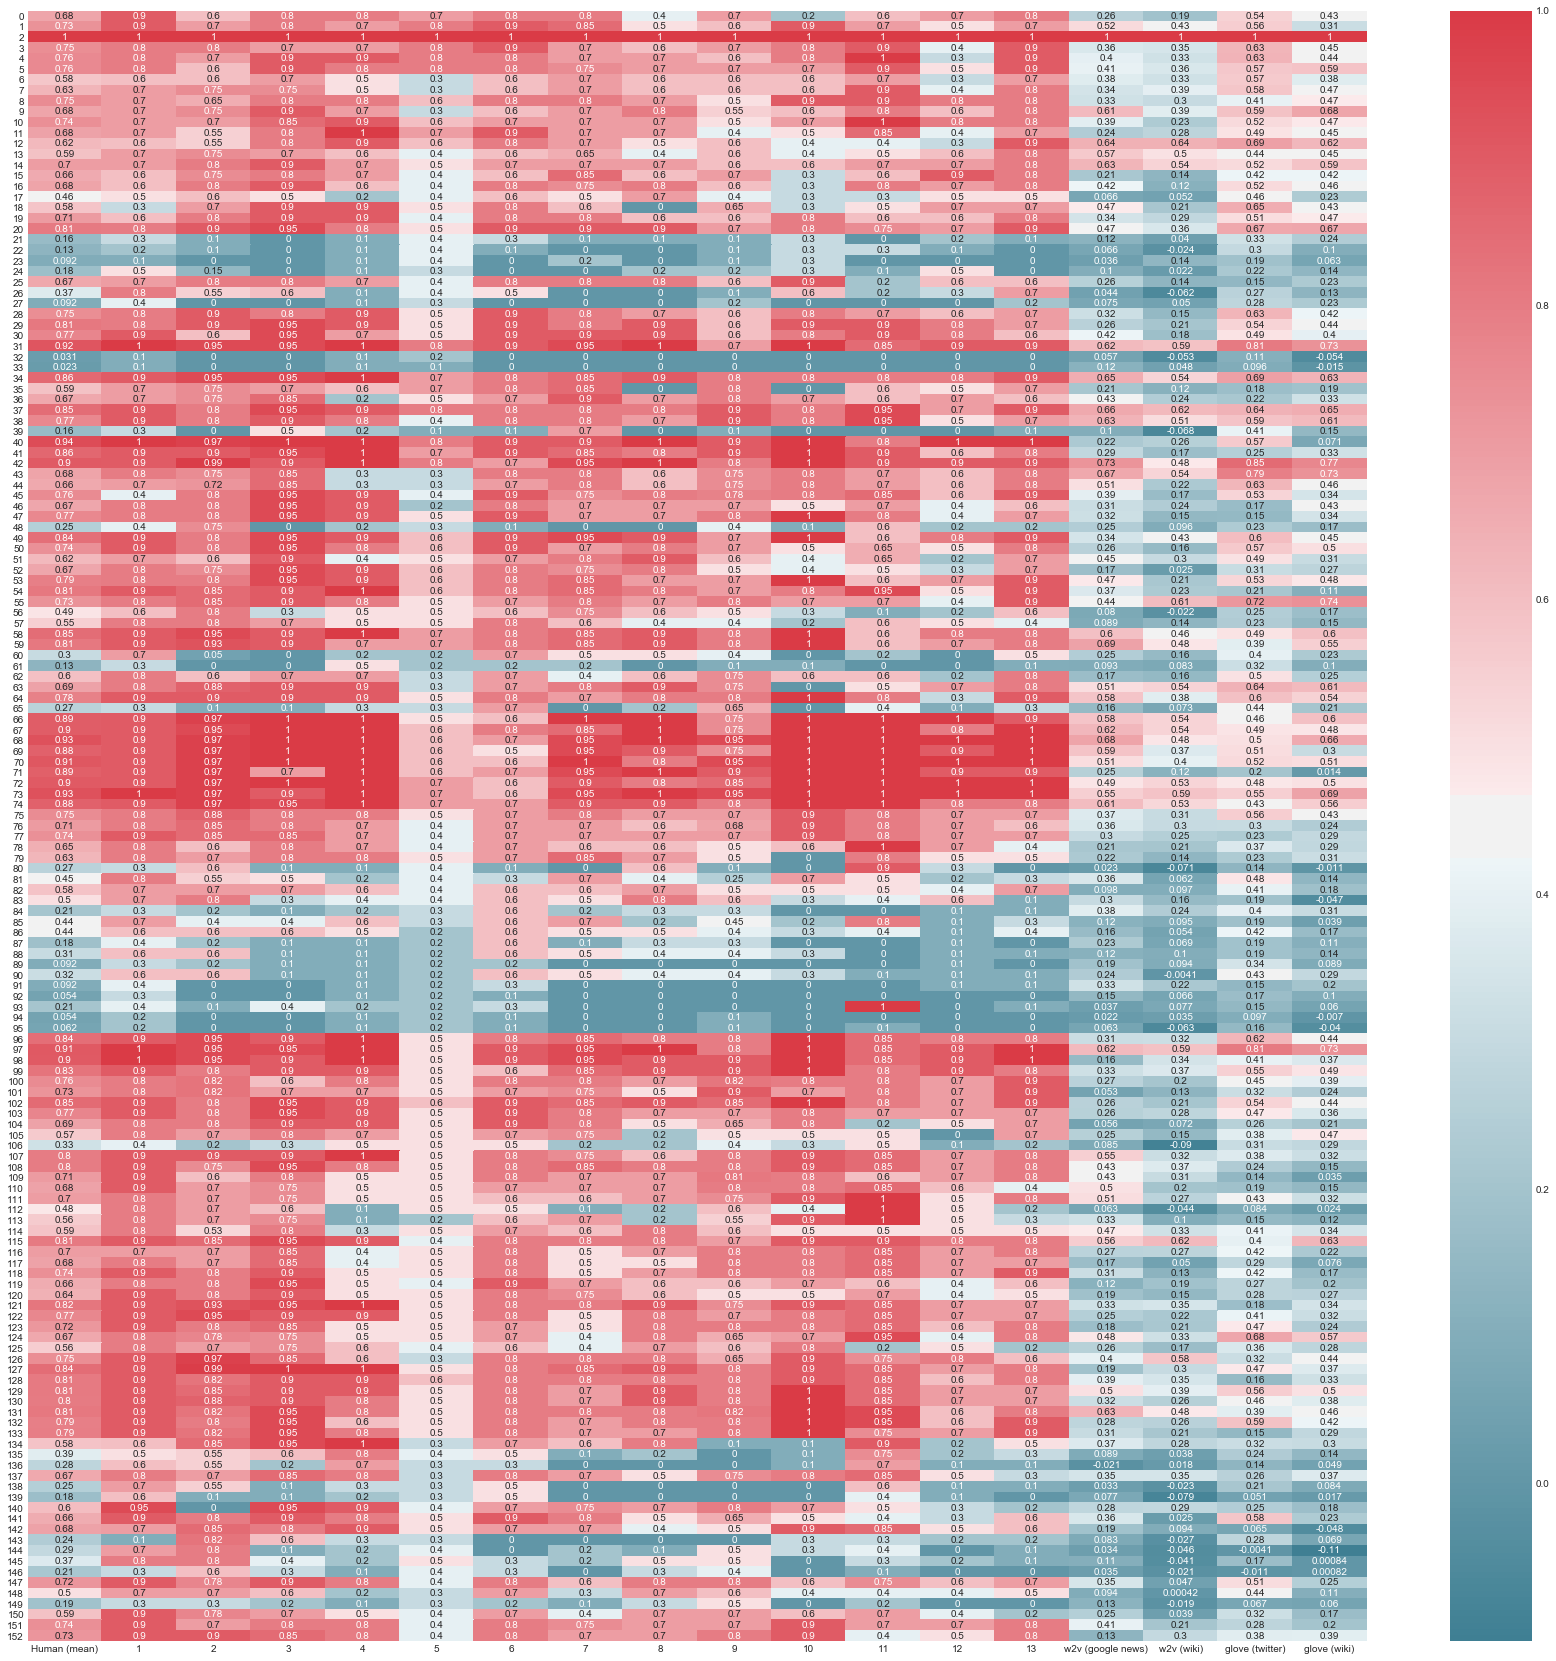

In [170]:
import seaborn as sns

plt.figure(figsize=(30,30))
# corr = correlations.corr()
sns.heatmap(correlations, cmap=colormap, annot=True)
# plt.savefig('wordsim_heat_set2.png')
plt.show()

In [177]:
similarities = []
for word1,word2 in zip(wordsim['Word 1'],wordsim['Word 2']):
    try:
        similarities.append(model1.similarity(word1.lower(),word2.lower()))
    except KeyError:
        continue

/Users/kreutzer/.pyenv/versions/miniconda3-latest/envs/datasci/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


In [178]:
correlations['w2v (wiki)'] = pd.Series(np.array(similarities))

In [179]:
correlations

,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,w2v (google news),w2v (wiki),glove (twitter),glove (wiki)
0,0.677,0.90,0.600,0.80,0.8,0.7,0.8,0.80,0.4,0.70,0.2,0.60,0.7,0.8,0.263938,0.193353,0.542518,0.428830
1,0.735,0.90,0.700,0.80,0.7,0.8,0.9,0.85,0.5,0.60,0.9,0.70,0.5,0.7,0.517296,0.432965,0.557040,0.312891
2,1.000,1.00,1.000,1.00,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.0,1.000000,1.000000,1.000000,1.000000
3,0.746,0.80,0.800,0.70,0.7,0.8,0.9,0.70,0.6,0.70,0.8,0.90,0.4,0.9,0.363463,0.351236,0.629073,0.454216
4,0.762,0.80,0.700,0.90,0.9,0.8,0.8,0.70,0.7,0.60,0.8,1.00,0.3,0.9,0.396392,0.333444,0.634711,0.441461
5,0.758,0.80,0.600,0.90,0.8,0.8,0.8,0.75,0.7,0.70,0.7,0.90,0.5,0.9,0.406862,0.355800,0.574871,0.585778
6,0.577,0.60,0.600,0.70,0.5,0.3,0.6,0.70,0.6,0.60,0.6,0.70,0.3,0.7,0.377970,0.330866,0.565777,0.381522
7,0.631,0.70,0.750,0.75,0.5,0.3,0.6,0.70,0.6,0.60,0.6,0.90,0.4,0.8,0.340256,0.392808,0.578369,0.467336
8,0.750,0.70,0.650,0.80,0.8,0.6,0.8,0.80,0.7,0.50,0.9,0.90,0.8,0.8,0.332185,0.300511,0.405956,0.471891
9,0.677,0.70,0.750,0.90,0.7,0.3,0.6,0.70,0.8,0.55,0.6,0.80,0.6,0.8,0.611497,0.385603,0.590702,0.678970


In [180]:
similarities = []
for word1,word2 in zip(wordsim['Word 1'],wordsim['Word 2']):
    try:
        word1 = '/c/en/' + word1
        word2 = '/c/en/' + word2
        similarities.append(model_concept.similarity(word1.lower(),word2.lower()))
    except KeyError:
        continue

In [181]:
correlations['conceptnet'] = pd.Series(np.array(similarities))

In [183]:
correlations.corr()

,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,w2v (google news),w2v (wiki),glove (twitter),glove (wiki),conceptnet
Human (mean),1.000000,0.871378,0.863689,0.930996,0.856117,0.718902,0.838984,0.900457,0.884141,0.886093,0.871647,0.798642,0.873629,0.913636,0.664588,0.692227,0.564702,0.669359,0.763971
1,0.871378,1.000000,0.760265,0.789040,0.683641,0.606674,0.768779,0.765995,0.769414,0.789705,0.764094,0.691009,0.713354,0.733506,0.520388,0.555683,0.400183,0.497097,0.601197
2,0.863689,0.760265,1.000000,0.796937,0.701228,0.589334,0.672551,0.730031,0.756376,0.748456,0.718733,0.698245,0.757268,0.757495,0.510730,0.522382,0.415758,0.517620,0.618993
3,0.930996,0.789040,0.796937,1.000000,0.808452,0.607450,0.809276,0.849604,0.794398,0.786254,0.781849,0.744402,0.772696,0.853489,0.607102,0.617559,0.522493,0.626240,0.692620
4,0.856117,0.683641,0.701228,0.808452,1.000000,0.645478,0.713990,0.782944,0.718921,0.676313,0.686438,0.667725,0.703191,0.787241,0.546323,0.620377,0.489361,0.616334,0.698993
5,0.718902,0.606674,0.589334,0.607450,0.645478,1.000000,0.569396,0.604789,0.579652,0.612155,0.594144,0.565329,0.621192,0.676420,0.506716,0.527647,0.474507,0.513680,0.570892
6,0.838984,0.768779,0.672551,0.809276,0.713990,0.569396,1.000000,0.777906,0.731263,0.754695,0.657453,0.596985,0.638840,0.767313,0.511035,0.525285,0.502932,0.562871,0.531672
7,0.900457,0.765995,0.730031,0.849604,0.782944,0.604789,0.777906,1.000000,0.797070,0.799985,0.748931,0.618437,0.762663,0.833222,0.647966,0.661453,0.545533,0.652372,0.727118
8,0.884141,0.769414,0.756376,0.794398,0.718921,0.579652,0.731263,0.797070,1.000000,0.791219,0.752959,0.649677,0.775899,0.770754,0.624819,0.643887,0.535985,0.616397,0.706377
9,0.886093,0.789705,0.748456,0.786254,0.676313,0.612155,0.754695,0.799985,0.791219,1.000000,0.778473,0.643984,0.773133,0.805656,0.604149,0.611784,0.476127,0.569255,0.646624


In [262]:
def heatMap(df, mirror, size, figname):
    
    sns.set(font_scale=1.5)
    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=size)
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
    if mirror == True:
       #Generate Heat Map, allow annotations and place floats in map
       sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", linewidths=0.3)
       #Apply xticks
#        plt.xticks(range(len(corr.columns)), corr.columns);
       #Apply yticks
#        plt.yticks(range(len(corr.columns)), corr.columns)
       #show plot

    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
        colormap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidths=0.3, xticklabels=True)
        # Apply xticks
#         plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
#         plt.yticks(range(len(corr.columns)), corr.columns);
        plt.title('Correlation Matrix of Similarity Judgements in Humans and Models', loc='center')
        
    # show plot
    plt.savefig(figname)
    plt.show()

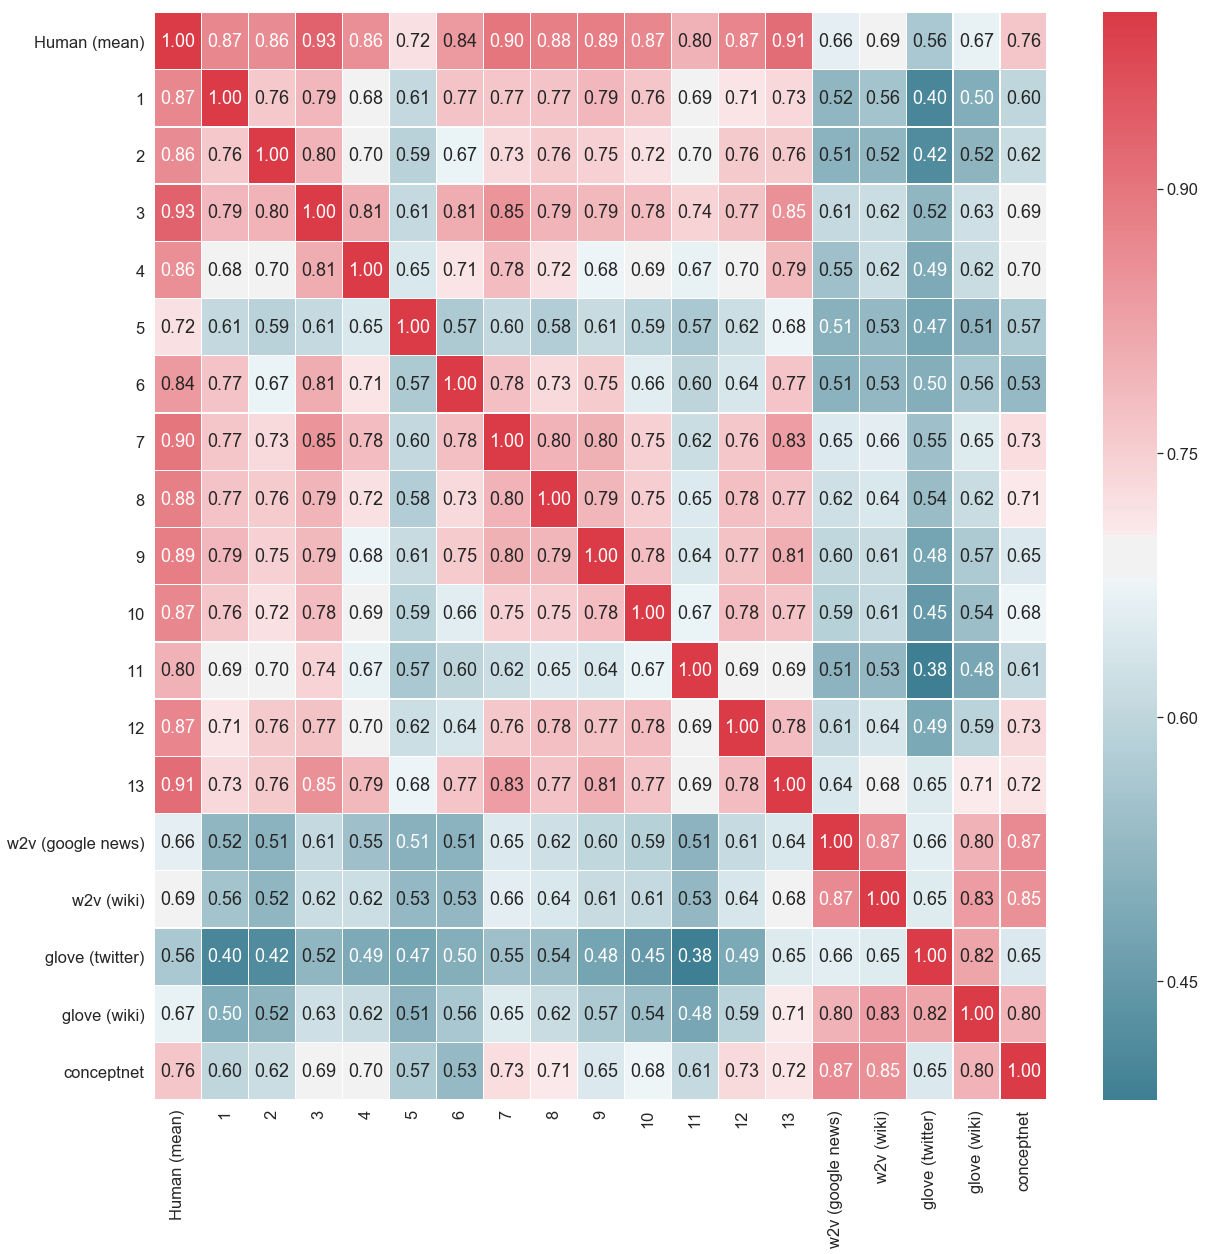

In [263]:
heatMap(correlations, mirror=True, size=(20,20), figname='heat_ws353_2.png')

In [229]:
similarities = []
for word1,word2 in zip(wordsim2['Word 1'],wordsim2['Word 2']):
    try:
        word1 = '/c/en/' + word1
        word2 = '/c/en/' + word2
        similarities.append(model_concept.similarity(word1.lower(),word2.lower()))
    except KeyError:
        continue

In [193]:
correlations2['conceptnet'] = pd.Series(np.array(similarities))

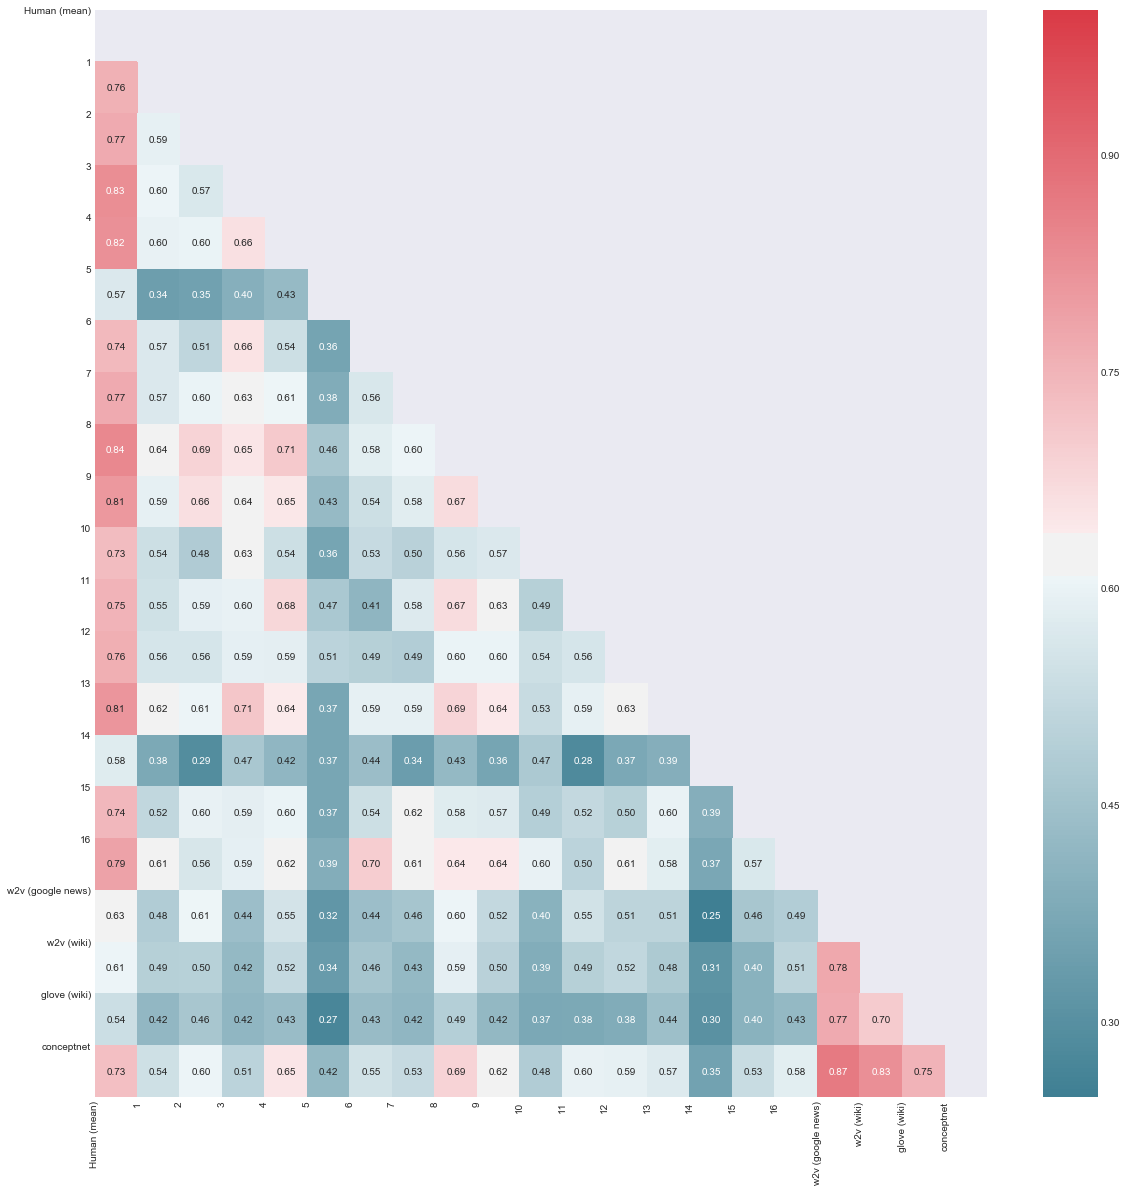

In [194]:
heatMap(correlations2, mirror=False, size=(20,20))

In [261]:
model1.wv.save_word2vec_format('w2v_wiki_201805')

2018-09-22 17:15:27,057 : INFO : storing 323381x300 projection weights into w2v_wiki_201805


人が手付けで特徴ベクトルを生成している以上，このデータはSimLexよりも人の「類似性」の判断において優れているのではないか？
これを確かめてみたい

In [8]:
mcrae_data = pd.read_excel('/Users/kreutzer/Dataset/McRae_norms/cos_matrix_brm_IFR.xlsx')

In [5]:
mcrae_data.head()

,CONCEPT,accordion,airplane,alligator,ambulance,anchor,ant,apartment,apple,apron,...,eagle,earmuffs,eel,eggplant,elephant,elevator,elk,emerald,emu,envelope
0,accordion,1.000,0.000,0.0,0.016,0.000,0.000,0.0,0.000,0.000,...,0.000,0.0,0.000,0.0,0.000,0.076,0.000,0.000,0.000,0.000
1,airplane,0.000,1.000,0.0,0.131,0.115,0.000,0.0,0.000,0.000,...,0.328,0.0,0.000,0.0,0.088,0.092,0.065,0.000,0.034,0.000
2,alligator,0.000,0.000,1.0,0.000,0.000,0.000,0.0,0.129,0.041,...,0.000,0.0,0.297,0.0,0.132,0.000,0.181,0.227,0.106,0.000
3,ambulance,0.016,0.131,0.0,1.000,0.017,0.038,0.0,0.078,0.000,...,0.023,0.0,0.000,0.0,0.058,0.028,0.068,0.000,0.023,0.128
4,anchor,0.000,0.115,0.0,0.017,1.000,0.000,0.0,0.000,0.000,...,0.027,0.0,0.000,0.0,0.068,0.079,0.023,0.000,0.026,0.000


In [3]:
simlex_data = pd.read_csv('/Users/kreutzer/Dataset/SimLex-999/SimLex-999.txt', sep='\t')

In [4]:
simlex_data.head()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


In [8]:
simlex

NameError: name 'simlex' is not defined

In [12]:
simlex_data

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
5,fast,rapid,A,8.75,3.32,3.07,2,5.66,1,1.68
6,happy,glad,A,9.17,2.56,2.36,1,5.49,1,1.59
7,short,long,A,1.23,3.61,3.18,2,5.36,1,1.58
8,stupid,dumb,A,9.58,1.75,2.36,1,5.26,1,1.48
9,weird,strange,A,8.93,1.59,1.86,1,4.26,1,1.30


In [9]:
import gensim

In [10]:
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/kreutzer/Dataset/wiki-news-300d-1M-subword.vec')

In [26]:
mcrae_data

,CONCEPT,accordion,airplane,alligator,ambulance,anchor,ant,apartment,apple,apron,...,eagle,earmuffs,eel,eggplant,elephant,elevator,elk,emerald,emu,envelope
0,accordion,1.000,0.000,0.000,0.016,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.076,0.000,0.000,0.000,0.000
1,airplane,0.000,1.000,0.000,0.131,0.115,0.000,0.000,0.000,0.000,...,0.328,0.000,0.000,0.000,0.088,0.092,0.065,0.000,0.034,0.000
2,alligator,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.129,0.041,...,0.000,0.000,0.297,0.000,0.132,0.000,0.181,0.227,0.106,0.000
3,ambulance,0.016,0.131,0.000,1.000,0.017,0.038,0.000,0.078,0.000,...,0.023,0.000,0.000,0.000,0.058,0.028,0.068,0.000,0.023,0.128
4,anchor,0.000,0.115,0.000,0.017,1.000,0.000,0.000,0.000,0.000,...,0.027,0.000,0.000,0.000,0.068,0.079,0.023,0.000,0.026,0.000
5,ant,0.000,0.000,0.000,0.038,0.000,1.000,0.115,0.113,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,apartment,0.000,0.000,0.000,0.000,0.000,0.115,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.114,0.000,0.000,0.000,0.000
7,apple,0.000,0.000,0.129,0.078,0.000,0.113,0.000,1.000,0.000,...,0.000,0.027,0.000,0.028,0.000,0.000,0.000,0.177,0.000,0.000
8,apron,0.000,0.000,0.041,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.067,0.055,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,armour,0.000,0.091,0.000,0.000,0.377,0.030,0.000,0.000,0.247,...,0.000,0.087,0.000,0.000,0.000,0.081,0.000,0.061,0.000,0.000


word2vecで，simlexに存在する単語対についてmcraeとの相関を取りたい

In [11]:
mcrae = []
simlex = []
w2v = []

for word in simlex_data.values:
#     print(word)
    if word[0] in mcrae_data['CONCEPT'].values:
        index1 = mcrae_data['CONCEPT'][mcrae_data['CONCEPT'].values == word[0]]
        index1_lex = simlex_data['word1'][simlex_data['word1'].values == word[0]]
#         print(mcrae_data[index])
#         print(mcrae_data.iloc[index.keys()[0]])
        if word[1] in mcrae_data.iloc[index1.keys()[0]]:
#             index2 = mcrae_data.iloc[index1.keys()[0]][mcrae_data.iloc[index1.keys()[0]] == word[1]]
#             index2_lex = simlex_data['SimLex999'][simlex_data['SimLex999'].values == word[0]]
            print(word[0], word[1], mcrae_data.iloc[index1.keys()[0]][word[1]])
            print('simlex', simlex_data.iloc[index1_lex.keys()[0]]['SimLex999'] / 10)
            print(model.distance(word[0], word[1]))
            mcrae.append(mcrae_data.iloc[index1.keys()[0]][word[1]])
            simlex.append(simlex_data.iloc[index1_lex.keys()[0]]['SimLex999'] / 10)
            w2v.append(model.distance(word[0], word[1]))
#             index2 = mcrae_data['CONCEPT'][mcrae_data['CONCEPT'].values == word[1]]
#             print(index.name)
#             print(mcrae_data.iloc[index.name])
#             print([mcrae_data.iloc[index.keys()[0]] == word[1]])
#             print(word[0], mcrae_data.iloc[index1.keys()[0]])
#             print(word[1], mcrae_data.iloc[index2.name])
#             print((word[0], word[1]), mcrae_data.iloc[index1.keys()[0], index2.name])
#             print(index2.name)
#         print()

dog cat 0.602
simlex 0.175
0.2497678433565521
bed bedroom 0.0
simlex 0.33999999999999997
0.33663946476729767
boat anchor 0.0
simlex 0.225
0.5088386636848289
mouse cat 0.377
simlex 0.11200000000000002
0.39299288580521075
ball cannon 0.0
simlex 0.258
0.49885985443279446
house apartment 0.414
simlex 0.58
0.3084003588862385
gun cannon 0.428
simlex 0.568
0.36622024025686095
ball basket 0.0
simlex 0.258
0.43251059789760493
door cellar 0.0
simlex 0.54
0.5524310256994182
chair bench 0.511
simlex 0.667
0.5240075622024017
sofa chair 0.546
simlex 0.667
0.4391912532982607
wall brick 0.031
simlex 0.46799999999999997
0.3692120640532711
boat car 0.166
simlex 0.225
0.4140833761557433
plate bowl 0.534
simlex 0.523
0.44729310232807806
jar bottle 0.726
simlex 0.783
0.3393431564910716
guitar drum 0.391
simlex 0.378
0.40605601273805036
bread cheese 0.281
simlex 0.333
0.38206140468036154
house carpet 0.0
simlex 0.58
0.49842218943492655
box elevator 0.0
simlex 0.132
0.6308699334348047
cottage cabin 0.524
sim

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
mcrae.shape

(28,)

In [166]:
combined.shape

(3, 28)

In [12]:
# make everything vector

combined = pd.DataFrame([mcrae, simlex, w2v], index=['mcrae', 'simlex', 'w2v']).T

In [13]:
com_corr = combined.corr()

In [178]:
com_corr

,mcrae,simlex,w2v
mcrae,1.000000,0.500794,-0.520761
simlex,0.500794,1.000000,-0.232436
w2v,-0.520761,-0.232436,1.000000


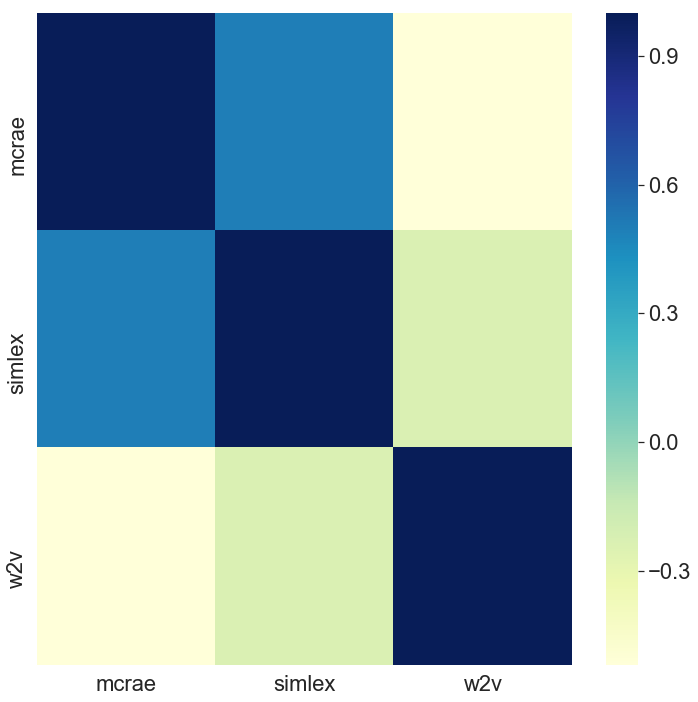

In [14]:
plt.figure(figsize=(12,12))
sns.set(font_scale=2)
sns.heatmap(com_corr, cmap='YlGnBu')
plt.savefig('simlex_mcrae_w2v_heat.png')

In [167]:
print(np.corrcoef(mcrae, simlex), np.corrcoef(w2v, simlex), np.corrcoef(mcrae, w2v))

[[1.        0.5007938]
 [0.5007938 1.       ]] [[ 1.        -0.2324362]
 [-0.2324362  1.       ]] [[ 1.         -0.52076055]
 [-0.52076055  1.        ]]


In [141]:
simlex_data

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
5,fast,rapid,A,8.75,3.32,3.07,2,5.66,1,1.68
6,happy,glad,A,9.17,2.56,2.36,1,5.49,1,1.59
7,short,long,A,1.23,3.61,3.18,2,5.36,1,1.58
8,stupid,dumb,A,9.58,1.75,2.36,1,5.26,1,1.48
9,weird,strange,A,8.93,1.59,1.86,1,4.26,1,1.30


In [101]:
mcrae_data

,CONCEPT,accordion,airplane,alligator,ambulance,anchor,ant,apartment,apple,apron,...,eagle,earmuffs,eel,eggplant,elephant,elevator,elk,emerald,emu,envelope
0,accordion,1.000,0.000,0.000,0.016,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.076,0.000,0.000,0.000,0.000
1,airplane,0.000,1.000,0.000,0.131,0.115,0.000,0.000,0.000,0.000,...,0.328,0.000,0.000,0.000,0.088,0.092,0.065,0.000,0.034,0.000
2,alligator,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.129,0.041,...,0.000,0.000,0.297,0.000,0.132,0.000,0.181,0.227,0.106,0.000
3,ambulance,0.016,0.131,0.000,1.000,0.017,0.038,0.000,0.078,0.000,...,0.023,0.000,0.000,0.000,0.058,0.028,0.068,0.000,0.023,0.128
4,anchor,0.000,0.115,0.000,0.017,1.000,0.000,0.000,0.000,0.000,...,0.027,0.000,0.000,0.000,0.068,0.079,0.023,0.000,0.026,0.000
5,ant,0.000,0.000,0.000,0.038,0.000,1.000,0.115,0.113,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,apartment,0.000,0.000,0.000,0.000,0.000,0.115,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.114,0.000,0.000,0.000,0.000
7,apple,0.000,0.000,0.129,0.078,0.000,0.113,0.000,1.000,0.000,...,0.000,0.027,0.000,0.028,0.000,0.000,0.000,0.177,0.000,0.000
8,apron,0.000,0.000,0.041,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.067,0.055,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,armour,0.000,0.091,0.000,0.000,0.377,0.030,0.000,0.000,0.247,...,0.000,0.087,0.000,0.000,0.000,0.081,0.000,0.061,0.000,0.000


In [42]:
simlex_data.

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
5,fast,rapid,A,8.75,3.32,3.07,2,5.66,1,1.68
6,happy,glad,A,9.17,2.56,2.36,1,5.49,1,1.59
7,short,long,A,1.23,3.61,3.18,2,5.36,1,1.58
8,stupid,dumb,A,9.58,1.75,2.36,1,5.26,1,1.48
9,weird,strange,A,8.93,1.59,1.86,1,4.26,1,1.30


In [11]:
if 'old' in mcrae_data['CONCEPT'].values:
    print(' ')

In [12]:
macrae_data[s]

NameError: name 'macrae_data' is not defined

In [13]:
for word in simlex_data.values:
    print(word)

['old' 'new' 'A' 1.58 2.72 2.81 2 7.25 1 0.41]
['smart' 'intelligent' 'A' 9.2 1.75 2.46 1 7.11 1 0.67]
['hard' 'difficult' 'A' 8.77 3.76 2.21 2 5.94 1 1.19]
['happy' 'cheerful' 'A' 9.55 2.56 2.34 1 5.85 1 2.18]
['hard' 'easy' 'A' 0.95 3.76 2.07 2 5.82 1 0.93]
['fast' 'rapid' 'A' 8.75 3.32 3.07 2 5.66 1 1.68]
['happy' 'glad' 'A' 9.17 2.56 2.36 1 5.49 1 1.59]
['short' 'long' 'A' 1.23 3.61 3.18 2 5.36 1 1.58]
['stupid' 'dumb' 'A' 9.58 1.75 2.36 1 5.26 1 1.48]
['weird' 'strange' 'A' 8.93 1.59 1.86 1 4.26 1 1.3]
['wide' 'narrow' 'A' 1.03 3.06 3.04 2 4.06 1 0.58]
['bad' 'awful' 'A' 8.42 1.68 1.92 1 3.41 1 1.74]
['easy' 'difficult' 'A' 0.58 2.07 2.21 1 2.83 1 0.36]
['bad' 'terrible' 'A' 7.78 1.68 2.04 1 2.31 1 1.43]
['hard' 'simple' 'A' 1.38 3.76 1.62 2 2.16 1 1.03]
['smart' 'dumb' 'A' 0.55 1.75 2.36 1 2.1 1 0.47]
['insane' 'crazy' 'A' 9.57 1.77 2.37 1 2.09 1 0.92]
['happy' 'mad' 'A' 0.95 2.56 2.76 2 2.07 1 1.4]
['large' 'huge' 'A' 9.47 3.37 3.54 2 2.0 1 1.27]
['hard' 'tough' 'A' 8.05 3.76 2.

In [37]:
mcrae_data['CONCEPT']

0           accordion
1            airplane
2           alligator
3           ambulance
4              anchor
5                 ant
6           apartment
7               apple
8               apron
9              armour
10            ashtray
11          asparagus
12            avocado
13                axe
14                bag
15            bagpipe
16               ball
17            balloon
18             banana
19              banjo
20             banner
21               barn
22             barrel
23           basement
24             basket
25       bat_(animal)
26     bat_(baseball)
27            bathtub
28              baton
29            bayonet
            ...      
511            turtle
512        typewriter
513          umbrella
514          unicycle
515               urn
516               van
517              veil
518              vest
519              vine
520            violin
521           vulture
522             wagon
523              wall
524            walnut
525       